# Filtro de Bayer

In [1]:
%matplotlib inline
import os
import numpy as np
import imageio
from scipy.ndimage import filters
import matplotlib.pyplot as plt
import PIL
from PIL import Image

## Create output folder

In [2]:
out_path = 'filtro_bayer'
if not os.path.exists(out_path):
    os.mkdir(out_path)

## Carrega uma imagem colorida

In [3]:
# im = imageio.imread('./images/arvore_800x800.png')
im = imageio.imread('./images/arvore_02_512x512.png')

In [4]:
# Se imagem possui mais de três canais. Remover o canal de transparência.
if im.ndim > 2:
    if im.shape[2] > 3:
        im = im[:,:,0:3]

In [5]:
print(im.shape)
print(im.dtype)
print(im.min(), im.max())

(512, 512, 3)
uint8
0 255


## Reduz a imagem para 16 x 16

In [6]:
# l = im.shape[0]//16
# w = im.shape[1]//16

# # Cria uma nova imagem em branco.
# im_new = np.zeros([16, 16, 3], dtype=np.uint8)

# c_i = 0 # Contador de linhas
# c_j = 0 # Contador de colunas

# for i in range(0, im.shape[0], l):
#     # TEST
#     ### print('--->' + str(i))
    
#     for j in range(0, im.shape[1], w):
#         # TEST
#         ### print(i, j)
        
#         im_temp = im[i:i+l, j:j+w, :]
        
#         # Calcula a média dos pixels da região para cada canal.
#         im_new[c_i, c_j, 0] = im_temp[:,:,0].mean()
#         im_new[c_i, c_j, 1] = im_temp[:,:,1].mean()
#         im_new[c_i, c_j, 2] = im_temp[:,:,2].mean()
        
#         # Incrementa a coluna
#         c_j = c_j + 1
        
#     # Incrementa a linha
#     c_i = c_i + 1       
#     # Inicializa a coluna
#     c_j = 0

In [7]:
im_new = im

In [8]:
print(im_new.dtype)
print(im_new.shape)

uint8
(512, 512, 3)


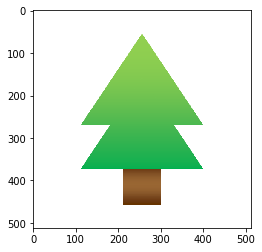

In [9]:
plt.imshow(im_new)

In [10]:
im_bayer = np.zeros([im_new.shape[0], im_new.shape[1]], dtype=np.uint8)

# Vermelho
im_bayer[1::2, 1::2] = im_new[1::2, 1::2, 0]
# Verde
im_bayer[1::2, 0::2] = im_new[1::2, 0::2, 1]
im_bayer[0::2, 1::2] = im_new[0::2, 1::2, 1]
# Azul
im_bayer[::2, ::2] = im_new[::2, ::2, 2]

In [11]:
im_bayer

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [12]:
im_bayer_rgb = np.zeros([im_new.shape[0], im_new.shape[1], 3], dtype=np.uint8)

# Vermelho
im_bayer_rgb[1::2, 1::2, 0] = im_new[1::2, 1::2, 0]
# Verde
im_bayer_rgb[1::2, 0::2, 1] = im_new[1::2, 0::2, 1]
im_bayer_rgb[0::2, 1::2, 1] = im_new[0::2, 1::2, 1]
# Azul
im_bayer_rgb[::2, ::2, 2] = im_new[::2, ::2, 2]

In [13]:
im_bayer_rgb

array([[[  0,   0, 255],
        [  0, 255,   0],
        [  0,   0, 255],
        ...,
        [  0, 255,   0],
        [  0,   0, 255],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [255,   0,   0],
        [  0, 255,   0],
        ...,
        [255,   0,   0],
        [  0, 255,   0],
        [255,   0,   0]],

       [[  0,   0, 255],
        [  0, 255,   0],
        [  0,   0, 255],
        ...,
        [  0, 255,   0],
        [  0,   0, 255],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [255,   0,   0],
        [  0, 255,   0],
        ...,
        [255,   0,   0],
        [  0, 255,   0],
        [255,   0,   0]],

       [[  0,   0, 255],
        [  0, 255,   0],
        [  0,   0, 255],
        ...,
        [  0, 255,   0],
        [  0,   0, 255],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [255,   0,   0],
        [  0, 255,   0],
        ...,
        [255,   0,   0],
        [  0, 255,   0],
        [255,   0,   0]]

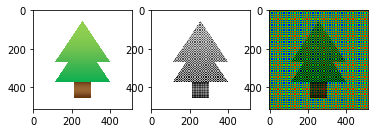

In [14]:
plt.subplot(1,3,1)
plt.imshow(im_new)
plt.subplot(1,3,2)
plt.imshow(im_bayer, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(im_bayer_rgb)

In [15]:
# Salva as imagens em arquivo.
imageio.imsave(out_path + '/' + 'im_bayer.png', im_bayer)
imageio.imsave(out_path + '/' + 'im_bayer_rgb.png', im_bayer_rgb)

In [16]:
## Resize the image to original size

In [17]:
im_bayer_ok = np.array(Image.fromarray(im_bayer).resize(size=(512, 512), resample=PIL.Image.NEAREST))
im_bayer_rgb_ok = np.array(Image.fromarray(im_bayer_rgb).resize(size=(512, 512), resample=PIL.Image.NEAREST))

In [18]:
# Salva as imagens em arquivo.
imageio.imsave(out_path + '/' + 'bayer_512x512.png', im_bayer_ok)
imageio.imsave(out_path + '/' + 'bayer_rgb_512x512.png', im_bayer_rgb_ok)

## Demosaicagem usando interpolação bi-linear

In [19]:
# Separa os canais da imagem RAW
im_bayer_r = np.zeros([im_bayer.shape[0], im_bayer.shape[1]], dtype=np.uint8)
im_bayer_g = np.zeros([im_bayer.shape[0], im_bayer.shape[1]], dtype=np.uint8)
im_bayer_b = np.zeros([im_bayer.shape[0], im_bayer.shape[1]], dtype=np.uint8)

# Vermelho
im_bayer_r[1::2, 1::2] = im_bayer[1::2, 1::2]
# Verde
im_bayer_g[1::2, 0::2] = im_bayer[1::2, 0::2]
im_bayer_g[0::2, 1::2] = im_bayer[0::2, 1::2]
# Azul
im_bayer_b[::2, ::2] = im_bayer[::2, ::2]

In [20]:
print(im_bayer_r)

[[  0   0   0 ...   0   0   0]
 [  0 255   0 ... 255   0 255]
 [  0   0   0 ...   0   0   0]
 ...
 [  0 255   0 ... 255   0 255]
 [  0   0   0 ...   0   0   0]
 [  0 255   0 ... 255   0 255]]


In [21]:
print(im_bayer_g)

[[  0 255   0 ... 255   0 255]
 [255   0 255 ...   0 255   0]
 [  0 255   0 ... 255   0 255]
 ...
 [255   0 255 ...   0 255   0]
 [  0 255   0 ... 255   0 255]
 [255   0 255 ...   0 255   0]]


In [22]:
print(im_bayer_b)

[[255   0 255 ...   0 255   0]
 [  0   0   0 ...   0   0   0]
 [255   0 255 ...   0 255   0]
 ...
 [  0   0   0 ...   0   0   0]
 [255   0 255 ...   0 255   0]
 [  0   0   0 ...   0   0   0]]


## Plota as imagens na tela.

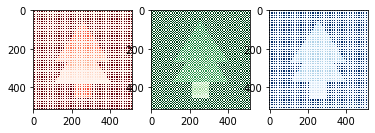

In [23]:
plt.subplot(1,3,1)
plt.imshow(im_bayer_r, cmap='Reds')
plt.subplot(1,3,2)
plt.imshow(im_bayer_g, cmap='Greens')
plt.subplot(1,3,3)
plt.imshow(im_bayer_b, cmap='Blues')

In [24]:
im_dem_r = np.zeros([im_bayer.shape[0], im_bayer.shape[1]], dtype=np.uint8)
im_dem_g = np.zeros([im_bayer.shape[0], im_bayer.shape[1]], dtype=np.uint8)
im_dem_b = np.zeros([im_bayer.shape[0], im_bayer.shape[1]], dtype=np.uint8)

In [25]:
mask_2 = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]], dtype=np.float) / 2
mask_4 = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]], dtype=np.float) / 4

im_temp_r_2 = filters.convolve(im_bayer_r, mask_2, mode='mirror')
im_temp_r_4 = filters.convolve(im_bayer_r, mask_4, mode='mirror')

im_temp_g_4 = filters.convolve(im_bayer_g, mask_4, mode='mirror')

im_temp_b_2 = filters.convolve(im_bayer_b, mask_2, mode='mirror')
im_temp_b_4 = filters.convolve(im_bayer_b, mask_4, mode='mirror')

In [26]:
print(im_temp_r_2)

[[254 255 254 ... 255 254 255]
 [255   0 255 ...   0 255   0]
 [254 255 254 ... 255 254 255]
 ...
 [255   0 255 ...   0 255   0]
 [254 255 254 ... 255 254 255]
 [255   0 255 ...   0 255   0]]


In [27]:
print(im_temp_r_4)

[[255 127 255 ... 127 255 127]
 [127   0 127 ...   0 127   0]
 [255 127 255 ... 127 255 127]
 ...
 [127   0 127 ...   0 127   0]
 [255 127 255 ... 127 255 127]
 [127   0 127 ...   0 127   0]]


In [28]:
print(im_temp_g_4)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [29]:
print(im_temp_b_2)

[[  0 255   0 ... 255   0 255]
 [255 254 255 ... 254 255 254]
 [  0 255   0 ... 255   0 255]
 ...
 [255 254 255 ... 254 255 254]
 [  0 255   0 ... 255   0 255]
 [255 254 255 ... 254 255 254]]


In [30]:
print(im_temp_b_4)

[[  0 127   0 ... 127   0 127]
 [127 255 127 ... 255 127 255]
 [  0 127   0 ... 127   0 127]
 ...
 [127 255 127 ... 255 127 255]
 [  0 127   0 ... 127   0 127]
 [127 255 127 ... 255 127 255]]


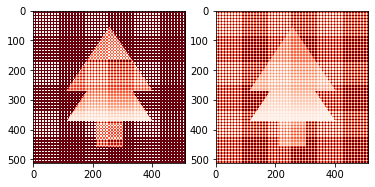

In [31]:
plt.subplot(1,2,1)
plt.imshow(im_temp_r_2, cmap='Reds')
plt.subplot(1,2,2)
plt.imshow(im_temp_r_4, cmap='Reds')

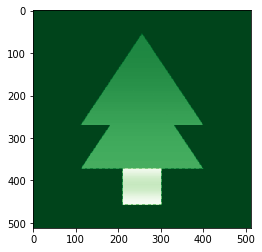

In [32]:
plt.subplot(1,1,1)
plt.imshow(im_temp_g_4, cmap='Greens')

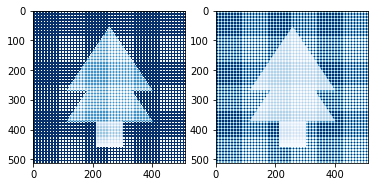

In [33]:
plt.subplot(1,2,1)
plt.imshow(im_temp_b_2, cmap='Blues')
plt.subplot(1,2,2)
plt.imshow(im_temp_b_4, cmap='Blues')

## Reconstrói imagem demosaicada

In [34]:
im_demosaic = np.zeros([im_bayer.shape[0], im_bayer.shape[1], 3], dtype=np.uint8)
im_demosaic[:,:,0] = im_bayer_r
im_demosaic[:,:,1] = im_bayer_g
im_demosaic[:,:,2] = im_bayer_b

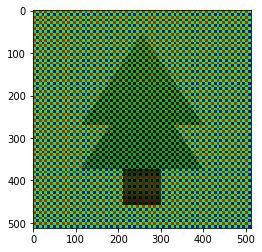

In [35]:
plt.imshow(im_demosaic)

In [36]:
# R -> G
im_demosaic[1::2, 1::2, 1] = im_temp_g_4[1::2, 1::2]
# R -> B
im_demosaic[1::2, 1::2, 2] = im_temp_b_4[1::2, 1::2]

# G -> R horizontal
im_demosaic[1::2, 0::2, 0] = im_temp_r_2[1::2, 0::2]
im_demosaic[0::2, 1::2, 0] = im_temp_r_2[0::2, 1::2]
# G -> B
im_demosaic[1::2, 0::2, 2] = im_temp_b_2[1::2, 0::2]
im_demosaic[1::2, 1::2, 2] = im_temp_b_2[1::2, 1::2]

# B -> R
im_demosaic[::2, ::2, 0] = im_temp_r_4[::2, ::2]
# B -> G
im_demosaic[::2, ::2, 1] = im_temp_g_4[::2, ::2]

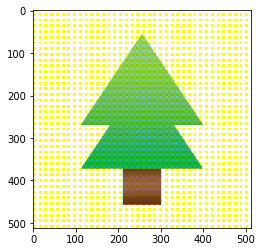

In [37]:
plt.imshow(im_demosaic)

In [38]:
print(im_demosaic[:,:,0])

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [39]:
print(im_demosaic[:,:,1])

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [40]:
print(im_demosaic[:,:,2])

[[255   0 255 ...   0 255   0]
 [255 254 255 ... 254 255 254]
 [255   0 255 ...   0 255   0]
 ...
 [255 254 255 ... 254 255 254]
 [255   0 255 ...   0 255   0]
 [255 254 255 ... 254 255 254]]
